# **LoanTap Business case study**

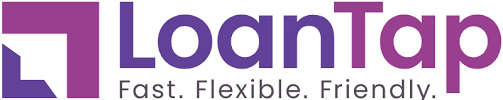



## **About:**


> 1. LoanTap is a Online platform that offers personalised loan products to salaried professionals, the platform aims to address the financial needs of young professionals who may not have accees to traditional banking products


> 2. LoanTap has become popular among young professionals and individuals looking for quick and easy credit without dealing with strict rules of regular banks


> 3. LoanTap's customer-centric appraoch and innovative loan products have contributed to its success in inidan fintech landscape





## **Objective**



> 1. The Objective of this business case study is to analyze LoanTap's innovative approach to providing suitable financials solutions to millennials(Generation Y), perticularly focusing on their Personal Loan Segment


> 2. LoanTap has gone ahead and planned to harness data science in their business for refining their credit underwriting process with a specific emphasis on personal loan segment.



> 3. This Case study aims to explore how loanTap can utilize data science to refine credit underwriting process and to uncover patterns in borrower behaviour and creditworthiness.


> 4. By analyzing the dataset the study seeks to gain crucial insights into the financial behaviors,spending habits and potentials risks associated with each borrower.



> 5. The **Ultimate Goal** is to optimize loan disbursal,with good balance between customer outreach and riskmanagement for LoanTap


















In [ ]:
#Importing necessary libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

In [ ]:
#Creating a data frame
df=pd.read_csv('/content/drive/MyDrive/ALL datasets/logistic_regression.csv')

In [ ]:
#Fetching first 5 records from the Data Frame
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.shape

(396030, 27)

In [ ]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

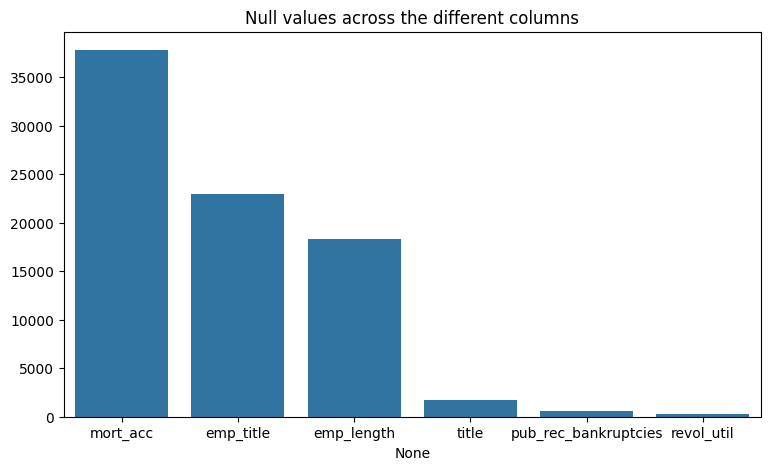

In [ ]:
null_counts=df.isnull().sum()
null_columns=null_counts[null_counts>0]
null_columns=null_columns.sort_values(ascending=False)
plt.figure(figsize=(9,5))
plt.title('Null values across the different columns')
sns.barplot(x=null_columns.index,y=null_columns.values)
plt.show()

**Observation**

1.Mort_acc column has highest number of null values

2.This column contains the no. of loans that borrower currently has or has had

3.The high number of null values could be due to a large number of applicants who do not have any mortgage accounts, or because this information was not recorded.

In [ ]:
df.describe(include=[np.number])

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394274,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48816,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


## **Feature Engineering**

In [ ]:
df['term']=df['term'].str.replace(" months",'').astype('int')
df['emp_length(Years)']=df['emp_length'].str.replace(" years",'')


In [ ]:
#some records are not correctly entered
df['verification_status'].value_counts()

,count
verification_status,
Verified,139563
Source Verified,131385
Not Verified,125082


In [ ]:
df['verification_status']=df['verification_status'].str.replace("Source Verified","Verified")

In [ ]:
df.duplicated().sum()  # there were no duplicate columns

0

In [ ]:
#Converting issue_d, earliest_cr_line column to date type
df['issue_d']=pd.to_datetime(df['issue_d'],format='%b-%Y')
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'],format='%b-%Y')

In [ ]:
df['issue_year']=df['issue_d'].dt.year
df['issue_month']=df['issue_d'].dt.month
df['issue_quarter']=df['issue_d'].dt.quarter

## **Visual Analysis**

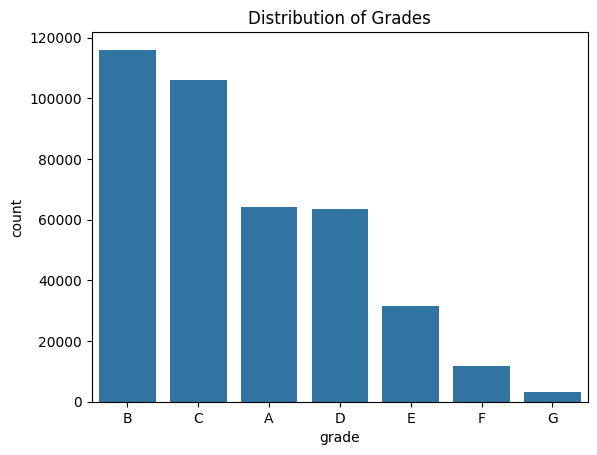

In [ ]:
plt.title('Distribution of Grades')
sns.countplot(data=df,x='grade',order=df['grade'].value_counts().index)
plt.show()

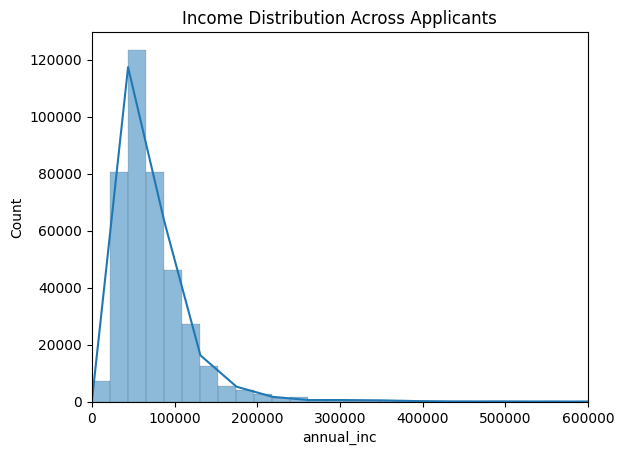

In [ ]:
plt.title('Income Distribution Across Applicants')
sns.histplot(df['annual_inc'],bins=400,kde=True)
plt.xlim(0, 600000)
plt.show()
#Distribution is right skewed

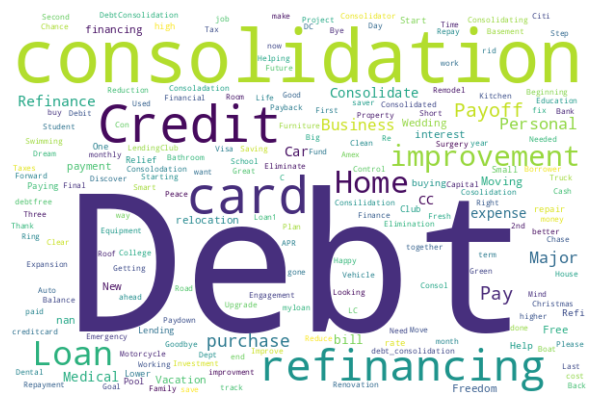

In [ ]:
from wordcloud import WordCloud
temp_title=df['title'].astype('str')
text=' '.join(temp_title)
wordcould= WordCloud(width=600,height=400,background_color='white',collocations=False,
                     max_font_size=200, prefer_horizontal=1.0, colormap='viridis').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcould,interpolation='bilinear')
plt.axis('off')
plt.show()

#most applicants are applying loan for "Debt_consolidation"

**Observation**

The common Loan title given by the barrower are "Debt", "Consolidation", "Credit","Loan"

<Axes: xlabel='loan_status', ylabel='count'>

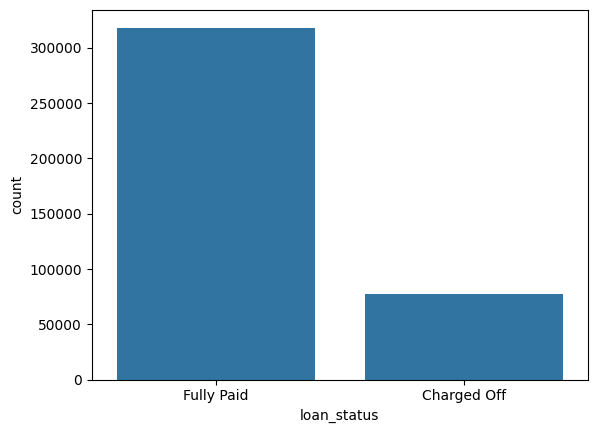

In [ ]:
sns.countplot(x=df['loan_status'])

**Observation**

We can see class imbalance in the target column, we can use SMOTE( Synthetic Minority Over-sampling Technique) to resample the data

In [ ]:
features_with_na=[features for features in df.columns if df[features].isna().sum()>0]
for feature in features_with_na:
  print(feature,np.round(df[feature].isnull().mean()*100,5),"%")

emp_title 5.78921 %
emp_length 4.62111 %
title 0.4434 %
revol_util 0.06969 %
mort_acc 9.54347 %
pub_rec_bankruptcies 0.13509 %
emp_length(Years) 4.62111 %


### **Encoding**

In [ ]:
df['grade']=df['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})
df['home_ownership'] =df['home_ownership'].map({'OWN': 1,'RENT': 2,'MORTGAGE': 3,'OTHER': 4,'NONE': 5,'ANY': 6})
df['verification_status']=df['verification_status'].map({'Verified':1,'Not Verified':0})
df['initial_list_status']=df['initial_list_status'].map({'f':1,'w':0})
df['application_type']=df['application_type'].map({'INDIVIDUAL': 1,'JOINT': 2,'DIRECT_PAY': 3})
df['loan_status']=df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
target_encoder = ce.TargetEncoder(cols=['purpose'])

# Fit and transform the data
df['purpose_encoded'] = target_encoder.fit_transform(df['purpose'], df['loan_status'])
df['emp_length(Years)']=df['emp_length(Years)'].map({'10+': 10,'2': 2,'< 1 year': 0.5,'3': 3,'5': 5,'1 year': 1,'4': 4,'6': 6,'7': 7,'8': 8,'9': 9})

In [ ]:
#removing Unnecessary columns
df.drop(['emp_title','emp_length','title','revol_util','address','sub_grade','emp_length','purpose','issue_d','earliest_cr_line'],axis=1,inplace=True)

In [ ]:
#missing value treatment
df['pub_rec_bankruptcies'].fillna(0,inplace=True) #fillings nulls with 0
df['mort_acc'].fillna(df['mort_acc'].mean(),inplace=True)
df['emp_length(Years)'].fillna(0,inplace=True)

**Observation**

mort_acc --indicates no. of mortgage accounts the applicant hold, it is importat for understanding the creditworthiness of applicant
Filling in the null values with the mode (i.e., the most frequently occurring value) is done to benefit the applicant. By doing so, we aim to enhance their chances of loan approval.

## **Model Building**

In [ ]:
X=df.drop(['loan_status'],axis=1)
y=df['loan_status']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve

In [ ]:
models={
    "Logisitic Regression":LogisticRegression(),

}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


    print('='*35)
    print('\n')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logisitic Regression
Model performance for Training set
- Accuracy: 0.8051
- F1 score: 0.7368
- Precision: 0.8114
- Recall: 0.9870
- Roc Auc Score: 0.5229
----------------------------------
Model performance for Test set
- Accuracy: 0.8039
- F1 score: 0.7352
- Precision: 0.8105
- Recall: 0.9866
- Roc Auc Score: 0.5220


